### Verification and Link Budget Calculations for Formula Electric Wireless Telemetry Project

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
# Put these in a seperate file later
def LBGenerator(distance, frequency):
    BudgetDict = {
    }
    lamb = 3e8/frequency
    Lp = 20*np.log10(lamb) - 20*np.log10(distance) - 21.98
    BudgetDict["Lp"] = [str(Lp), "dBi"]
    return BudgetDict

def PowerRecCalc(BudgetDict):
    Pr = float(BudgetDict.get("Pt")[0]) + float(BudgetDict.get("Lp")[0]) + float(BudgetDict.get("Gt")[0]) + float(BudgetDict.get("Gr")[0]) 
    BudgetDict["Pr"] = [str(Pr), "dBm"]
    return BudgetDict

### 2.4GHz Option

For the 2.4 GHz Calculations, we run the path loss calculations, use the given power transmit for the Synapse 2.4GHz RF 220SU Module. The values pulled from that data sheet linked (HERE)
| Transmit Power Output | Receiver Sensitivity|
|----------|----------|
| + 20 dBm| -103dBm | 


In [56]:
LinkBudget24 = LBGenerator(500, 2.4e9)
LinkBudget24["Pt"] = ["20", "dBm"]
LinkBudget24["RS"] = ["-103", "dBm"]

In order to accomodate for the irregular shape of the car, a half sleeve dipole will be used for the tranmitting, this has an approximate gain of 6 dBi. For now, the same will be used for the receiving antnenna.

In [57]:
LinkBudget24["Gt"] = ["6", "dBi"]
LinkBudget24["Gr"] = ["6", "dBi"]

Without cable specifications, we account for the only being the path loss at $500 m$ which is far but represents the ma on a typical test day. Then calculating the power received and if that meets the receiver sensitivty and fade margin requirements.

In [58]:
LinkBudget24 = PowerRecCalc(LinkBudget24)
df = pd.DataFrame.from_dict(LinkBudget24,orient='index',
                       columns=['Value', 'Units'])
print(df)

                 Value Units
Lp  -80.04179973983888   dBi
Pt                  20   dBm
RS                -103   dBm
Gt                   6   dBi
Gr                   6   dBi
Pr  -48.04179973983888   dBm


While checking for Fade Margin of $ 20 \; dBm$, we see that we are above the receiver sensitivity (less negative).

In [65]:
print(float(LinkBudget24.get("Pr")[0]) > float(LinkBudget24.get("RS")[0])  )

True


So for the parameters set, without accounting for cable loss and free space, this configuration will work.

### 900MHz Option

For the 2.4 GHz Calculations, we run the path loss calculations, use the given power transmit for the RFDesign RFD900x Radio Modem. The values pulled from that data sheet linked (HERE)
| Transmit Power Output | Receiver Sensitivity| Low Noise Amplifier|
|----------|----------| ----------|
| + 30 dBm| >121dBm | >20dBm | 

Then filling out the table with values given, note we will be using the same configuration of antenna. 


In [69]:

LinkBudget900 = LBGenerator(2000, 900e6)
LinkBudget900["Gt"] = ["6", "dBi"]
LinkBudget900["Gr"] = ["6", "dBi"]
LinkBudget900["Pt"] = ["30", "dBm"]
LinkBudget900["RS"] = ["-121", "dBm"]
LinkBudget900 = PowerRecCalc(LinkBudget900)
df = pd.DataFrame.from_dict(LinkBudget900,orient='index',
                       columns=['Value', 'Units'])
print(df)

                 Value Units
Lp  -97.54302500767288   dBi
Gt                   6   dBi
Gr                   6   dBi
Pt                  30   dBm
RS                -121   dBm
Pr  -55.54302500767288   dBm


## Fresnel Zones

The Fresnel Zone tells us where the maximum height object can exist without greatly disrupting the signal. In our case this will most likely be a person standing in between the car and receiving station.

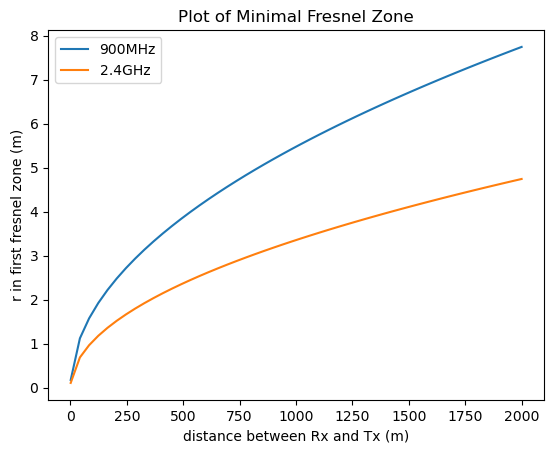

In [71]:
delt_d = np.linspace(1, 2000)
lamnb = 3e8 / 900e6
d1 = delt_d / 2
delt_r = 0.6 * np.sqrt(lamnb * d1**2 / delt_d)
plt.plot(delt_d, delt_r, label='900MHz')

lamnb = 3e8 / 2.4e9
delt_r = 0.6 * np.sqrt(lamnb * d1**2 / delt_d)
plt.plot(delt_d, delt_r, label='2.4GHz')

plt.legend(loc='upper left')
plt.xlabel('distance between Rx and Tx (m)')
plt.ylabel('r in first fresnel zone (m)')
plt.title('Plot of Minimal Fresnel Zone')
plt.show()

So at the max distance for each, which is around $2000 m$. This poses an interesting issue as the lower frequency is supposed handle itself better at longer distances. According to the graph, the minimum height for receiver 